In [33]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.optimize import curve_fit

<_io.TextIOWrapper name='Physics_307_Lab_1_new.csv' mode='r' encoding='cp1252'>
[2422.58489765   56.92128298    4.22892575]


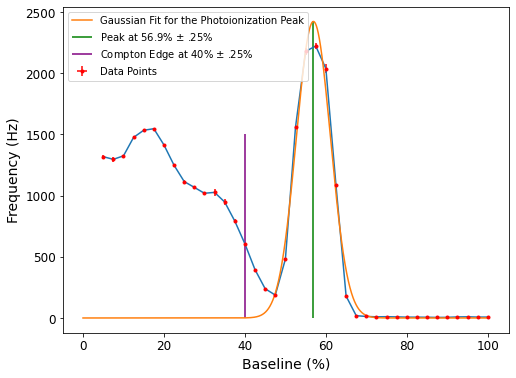

In [38]:
source = 'Physics_307_Lab_1_new.csv'
#csv.reader(source)

file = open(source)
print(file)

csvreader = csv.reader(file)
#print(csvreader)

data = pd.read_csv(source)
baseline_float = [float(x) for x in data['Baseline (%)']]
frequency_float = [float(x) for x in data['Frequency']]
error_float = [float(x) for x in data['Error']]
baseline_error_float = [float(x) for x in data['Baseline Error']]

x = np.arange(0, 100, 0.0001)
#print(x)

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, baseline_float, frequency_float, p0 = [2500, 60, 5])
print(popt)

#popt1, pcov1 = curve_fit(gauss_function, baseline_float, frequency_float, p0 = [1.1, 40, 3])
#print(popt1)

fig = plt.figure(figsize = (8, 6))
plt.plot(baseline_float, frequency_float)
plt.errorbar(baseline_float, frequency_float, yerr = error_float, xerr = baseline_error_float, fmt='r.', label='Data Points')

#plot the fit results
plt.plot(x, gauss_function(x, popt[0], popt[1], popt[2]), label = 'Gaussian Fit for the Photoionization Peak')
#plt.plot(x, gauss_function(x, 1.04, 37.5, 5), label = 'Gaussian Fit for the Photoionization Peak')

plt.xlabel('Baseline (%)', fontsize = 14)
plt.ylabel('Frequency (Hz)', fontsize = 14)
vline = plt.vlines(popt[1], 0, popt[0], colors = 'g', label = 'Peak at 56.9% $\pm$ .25%')
vline = plt.vlines(40, 0, 1500, colors = 'purple', label = 'Compton Edge at 40% $\pm$ .25%')
    
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()

plt.savefig('TTL_Cesium.png', bbox_inches='tight')

<_io.TextIOWrapper name='Cesium_new.csv' mode='r' encoding='cp1252'>
[2132.08959001  771.09376013   22.72244824]
2210.0


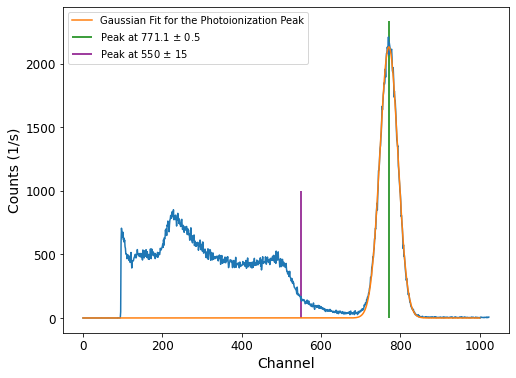

In [30]:
source = 'Cesium_new.csv'
#csv.reader(source)

file = open(source)
print(file)

csvreader = csv.reader(file)
#print(csvreader)

data = pd.read_csv(source)
baseline_float = [float(x) for x in data['Channel']]
frequency_float = [float(x) for x in data['Counts']]
#error_float = [float(x) for x in data['Error']]

x = np.arange(0, 1000, 0.0001)
#print(x)

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, baseline_float, frequency_float, p0 = [2500, 750, 5])
print(popt)
print(np.max(frequency_float))
#print(frequency_float[770])

fig = plt.figure(figsize = (8, 6))
plt.plot(baseline_float, frequency_float)

#plot the fit results
plt.plot(x, gauss_function(x, popt[0], popt[1], popt[2]), label = 'Gaussian Fit for the Photoionization Peak')

plt.xlabel('Channel', fontsize = 14)
plt.ylabel('Counts (1/s)', fontsize = 14)

vline = plt.vlines(popt[1], 0, popt[0]+200, colors = 'g', label = 'Peak at 771.1 $\pm$ 0.5')
vline = plt.vlines(550, 0, 1000, colors = 'purple', label = 'Peak at 550 $\pm$ 15')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()

plt.savefig('Cesium_fig.png', bbox_inches='tight')

<_io.TextIOWrapper name='Co_Cs_new.csv' mode='r' encoding='cp1252'>
[6955.45992686  381.39562491   11.99052374] [367.33266082 777.67299245  17.6169762 ] [418.93115541 680.20181964  21.89392419]


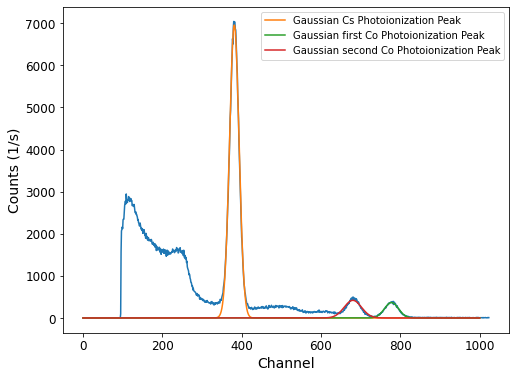

In [29]:
source = 'Co_Cs_new.csv'
#csv.reader(source)

file = open(source)
print(file)

csvreader = csv.reader(file)
#print(csvreader)

data = pd.read_csv(source)
baseline_float = [float(x) for x in data['Channel']]
frequency_float = [float(x) for x in data['Counts']]
#error_float = [float(x) for x in data['Error']]

x = np.arange(0, 1000, 0.0001)
#print(x)

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, baseline_float, frequency_float, p0 = [7041, 390, 5])
popt1, pcov2 = curve_fit(gauss_function, baseline_float, frequency_float, p0 = [700, 790, 5])
popt2, pcov2 = curve_fit(gauss_function, baseline_float, frequency_float, p0 = [700, 690, 5])

print(popt, popt1, popt2)
#print(np.max(frequency_float))
#print(frequency_float[770])

fig = plt.figure(figsize = (8, 6))
plt.plot(baseline_float, frequency_float)

#plot the fit results
plt.plot(x, gauss_function(x, popt[0], popt[1], popt[2]), label = 'Gaussian Cs Photoionization Peak')
plt.plot(x, gauss_function(x, popt1[0], popt1[1], popt1[2]), label = 'Gaussian first Co Photoionization Peak')
plt.plot(x, gauss_function(x, popt2[0], popt2[1], popt2[2]), label = 'Gaussian second Co Photoionization Peak')

plt.xlabel('Channel', fontsize = 14)
plt.ylabel('Counts (1/s)', fontsize = 14)

#vline = plt.vlines(popt[1], 0, popt[0]+200, colors = 'g', label = 'Peak at 771.1 $\pm$ 0.5')
#vline = plt.vlines(550, 0, 1000, colors = 'purple', label = 'Peak at 550 $\pm$ 15')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc = 'upper right')

plt.savefig('Cesium_fig.png', bbox_inches='tight')